In [30]:
#%matplotlib notebook
import requests
from bs4 import BeautifulSoup

# from google.colab import files

#url_req = (['?imei=350424060069364&s_dt=2022-09-09%2006:10:44&e_dt=2022-09-14%2016:34:30']) #485

#url_req = (['?imei=350424060069364&s_dt=2022-09-09%2006:40:00&e_dt=2022-09-09%2018:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-11%2006:02:00&e_dt=2022-09-11%2018:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-10%2000:00:00&e_dt=2022-09-13%2023:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-19%2007:02:00&e_dt=2022-09-19%2016:30:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-10-01%2009:00:00&e_dt=2022-10-01%2023:59:59'])
#url_req = (['?imei=356307049571887&s_dt=2022-10-10%2005:44:59&e_dt=2022-10-10%2008:30:59'])
#url_req = (['?imei=356307049571887&s_dt=2022-10-30%2000:00:00&e_dt=2022-10-30%2023:59:59'])
#url_req = (['?imei=350424060069364&s_dt=2022-10-17%2000:00:00&e_dt=2022-10-17%2023:59:59'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-26%2009:40:00&e_dt=2022-09-26%2019:10:59'])
#url_req = (['?imei=350424060069364&s_dt=2022-10-17%2007:00:44&e_dt=2022-10-19%2013:40:30'])
#url_req = (['?imei=350424060069364&s_dt=2022-10-18%2008:40:44&e_dt=2022-10-18%2016:40:30'])
url_req = (['?imei=350424060069364&s_dt=2022-10-18%2006:50:12&e_dt=2022-10-18%2017:34:39'])

web_link = 'https://nav.by/info/testAccel.php'

db_files = []

### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload = {}
headers = {
    'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


### postman

def remove_str(value, deletechars_):
    for c in deletechars_:
        value = value.replace(c, '_')
    return value


NUM_OF_FILES = len(url_req)
for p in range(NUM_OF_FILES):

    name_of_file = remove_str(url_req[p], '\/:*?"<>|&%=-')
    db_files.append(name_of_file)

    print(name_of_file)

    file = open(name_of_file + ".csv", "w")
    file.close()

    response = requests.request("GET", web_link + url_req[p], headers=headers, data=payload)
    soup = BeautifulSoup(response.text, 'lxml')

    file = open(name_of_file + ".csv", "a+")

    quotes = soup.find_all('p')
    for quote in quotes:
        file.write(quote.text)
    file.close()

    file = open(name_of_file + ".csv", "r")
    lines = file.readlines()
    file.close()

    f_first_line = 1

    file = open(name_of_file + ".csv", "w")
    for line in lines:
        if f_first_line == 1:
            file.write(line)
            f_first_line = 0
        if ((
                line != "date;speed;78;64011;64022;64033;64044;delta64011;delta64022;delta64033;delta64044;vodo;lat;lon;dir;alt;engine_speed;distance_gps;201;202;203;204;210;211;212;213;214;215;ain1;ain2;151;146;147\n") and (
                line != "\n")):
            file.write(line)

    file.close()

{"url":".\/info\/help.php","exitCode":0}
_imei_350424060069364_s_dt_2022_10_18_2006_50_12_e_dt_2022_10_18_2017_34_39


In [31]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import seaborn as sns
from array import array

sns.set(style="darkgrid")

In [32]:
from scipy.optimize import curve_fit

# initial guesses for k1, k2, k3, k4, k5, k6:
kfc3_init = 1.0, 1.0, 1.0, 1.0

def func3_fuel_consumption(x, k2, k3, k4, k5):
    delta_es_app_, delta_es_2_app_, delta_es_app_2_, delta_es_2_app_2_ = x
    return k2 * delta_es_app_ + k3 * delta_es_2_app_ + k4 * delta_es_app_2_ + k5 * delta_es_2_app_2_

def func_fuel_consumption(x, k1, k2, k3, k4):
    delta_es_app_, delta_es_app_3_, delta_es_app_2_, delta_es_ = x
    return k1 * delta_es_app_ + k2 * delta_es_app_3_ + k3 * delta_es_app_2_ + k4 * delta_es_

152393
93634
100162
61624
---
1.6275391417647436
1.52146522633334
2.4729488510969753


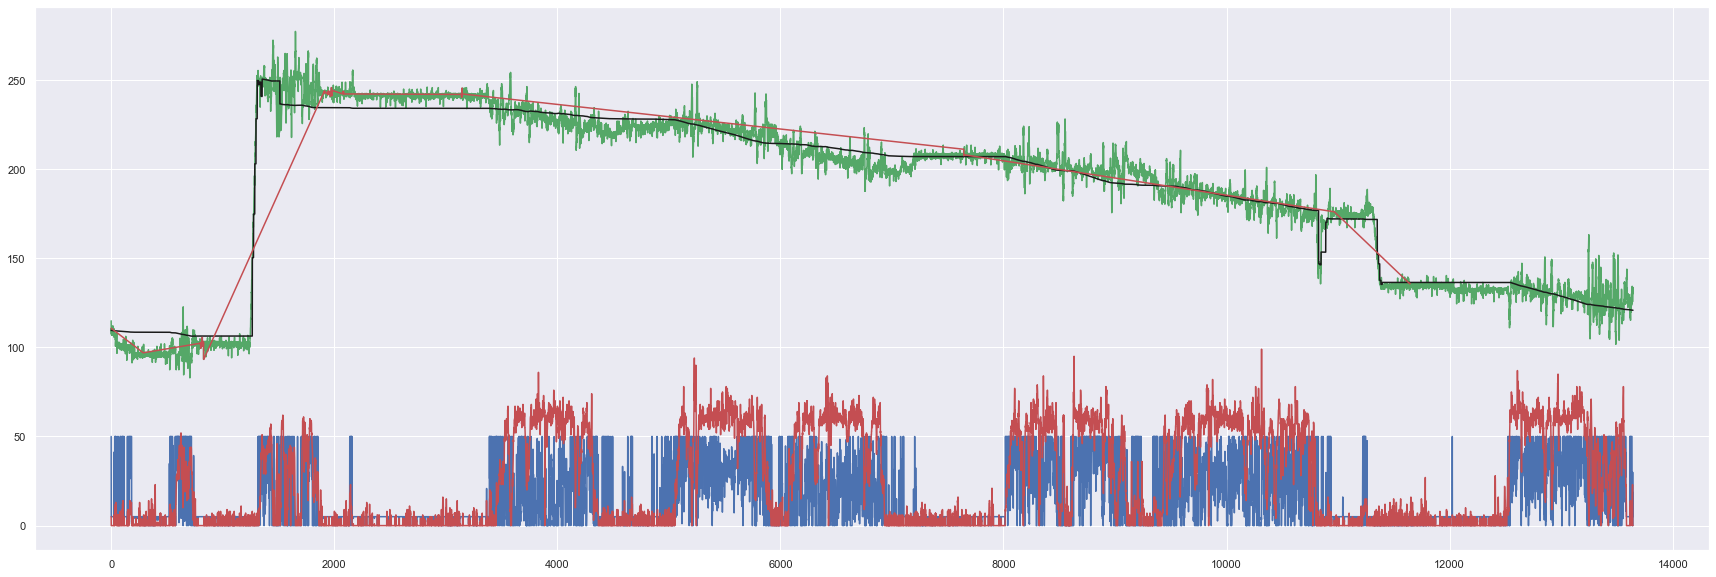

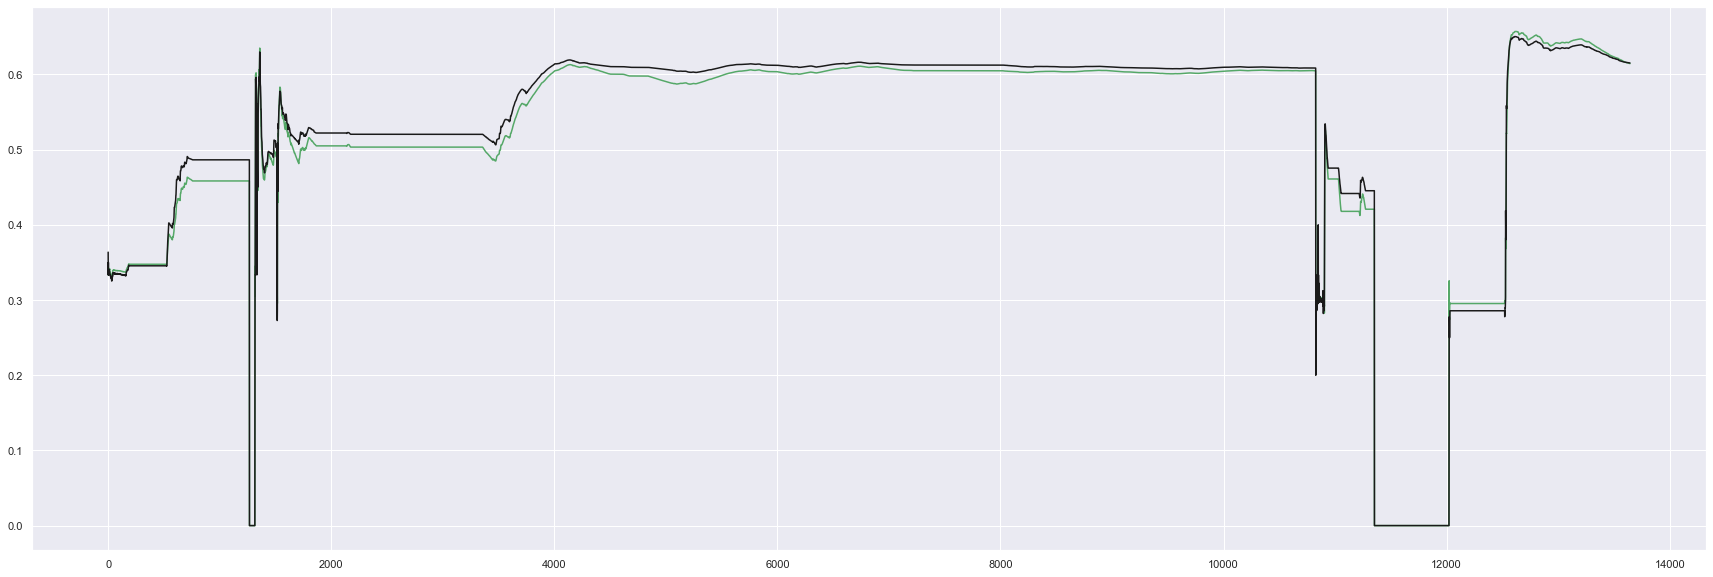

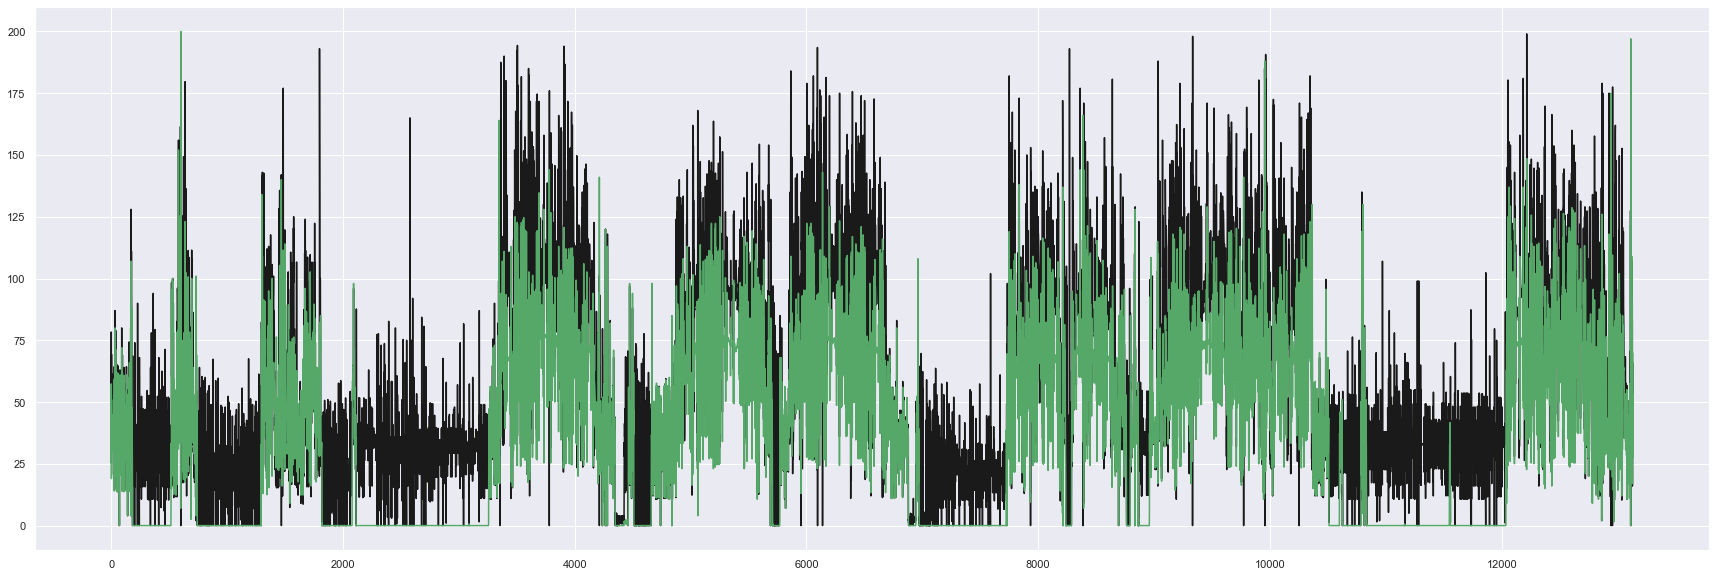

In [33]:
delta_ES = []
delta_ES_APP = []
delta_ES_2_APP = []
delta_ES_APP_2 = []
delta_ES_2_APP_2 = []

inst_cons = []
inst_speed = []
inst_acc_plus = []
inst_acc_minus = []
dut_rf = []
dut = []
dut_validated = []
es = []
app = []
ttt = []
relation1 = []
relation2 = []
relation3 = []
relation4 = []
relation5 = []
relation6 = []
relation7 = []
relation8 = []
relation9 = []

#popt3_calc = [(0.003276728)*1.8684/100, (-0.008181688)*1.8684/100, 0.004813692*3.4909/100, (-3.33334E-05)*3.4909/100]

#popt3_calc = [-0.00046106, 0.00161761, 0.00071542, -0.00223232]
popt3_calc = [ 1.10312821e-03, -4.10197952e-07, -1.03106851e-03, -2.41338547e-04]
#popt3_calc = [-0.0004165, 0.00139085, 0.00069779, -0.00197738]

#popt3_calc = [110*0.0/1391684.0, 112*0.0/854199.0, 112*0.0/973357.0, 112*1.0/586476.0]
#popt3_calc = [(0.000127846)/(1000), (-0.010824075)/(1000), 0.030237583/(1000), (0.003790046)/(1000)]

df = pd.read_csv(db_files[0] + '.csv', sep=';', engine='python', decimal='.')
df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
              'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
              'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
              'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2', 'CAN1', 'CAN2', 'CAN3']


df["consum_l"] = 0.0
df["consum_t"] = 0.0
df["dut_calc"] = 0.0
df["dut_validated"] = 0.0

df["sum_ES_can"] = 0.0
df["sum_APP_can"] = 0.0
df["sum_ES_APP_can"] = 0.0
df["sum_ES_2_APP_can"] = 0.0
df["sum_ES_APP_2_can"] = 0.0
df["sum_ES_2_APP_2_can"] = 0.0
df["sum_ES_APP_3_can"] = 0.0
df["sum_ES_3_APP_can"] = 0.0
df["sum_ES_2_APP_3_can"] = 0.0
df["sum_ES_3_APP_2_can"] = 0.0
df["sum_ES_3_APP_3_can"] = 0.0
df["sum_ES_2_can"] = 0.0

sum_ES_sum = 0
sum_APP_sum = 0
sum_ES_APP_sum = 0
sum_ES_2_APP_sum = 0
sum_ES_APP_2_sum = 0
sum_ES_2_APP_2_sum = 0
sum_ES_APP_3_sum = 0
sum_ES_3_APP_sum = 0
sum_ES_2_APP_3_sum = 0
sum_ES_3_APP_2_sum = 0
sum_ES_3_APP_3_sum = 0
sum_ES_2_sum = 0

sum_ES_inst = 0
sum_APP_inst = 0
sum_ES_APP_inst = 0
sum_ES_2_APP_inst = 0
sum_ES_APP_2_inst = 0
sum_ES_2_APP_2_inst = 0
sum_ES_APP_3_inst = 0
sum_ES_3_APP_inst = 0
sum_ES_2_APP_3_inst = 0
sum_ES_3_APP_2_inst = 0
sum_ES_3_APP_3_inst = 0
sum_ES_2_inst = 0

dut_begine = df.AnIn1[0]#0

count_p = 0
count_m = 0
time_quiet = 0
last_quiet = df.AnIn1[0]
flag_memrise = 1
time_action = 0

count_rel = 0
relation_freez1 = 0
relation_freez2 = 0
relation_freez3 = 0

max_es = 1000
max_app = 200
delta_es = 5
delta_app = 5
num_interval_es = max_es//delta_es
num_interval_app = max_app//delta_app
working_time = [[0] * num_interval_es for i in range(num_interval_app)]
datatime_prev = df.date[0]


for i in range(2, len(df)):

############ CAN-bus:
    try:
        can1_ = int(df.CAN1[i])
        can1_prev = int(df.CAN1[i-1])
    except:
        print("err1:")
        print(i)
        print(df.CAN1[i])

    sum_ES_inst = (can1_&0xffff) - (can1_prev&0xffff)
    while sum_ES_inst < 0:
        sum_ES_inst += 32000
    sum_ES_sum += sum_ES_inst

    sum_APP_inst = ((can1_>>16)&0xffff) - ((can1_prev>>16)&0xffff)
    while sum_APP_inst < 0:
        sum_APP_inst += 32000
    sum_APP_sum += sum_APP_inst

    if ((can1_>>32)&0xffff) >= ((can1_prev>>32)&0xffff):
        sum_ES_APP_inst = ((can1_>>32)&0xffff) - ((can1_prev>>32)&0xffff)
    else:
        sum_ES_APP_inst = ((can1_>>32)&0xffff) - ((can1_prev>>32)&0xffff) + 32000
    sum_ES_APP_sum += sum_ES_APP_inst

    if ((can1_>>48)&0xffff) >= ((can1_prev>>48)&0xffff):
        sum_ES_2_APP_inst = ((can1_>>48)&0xffff) - ((can1_prev>>48)&0xffff)
    else:
        sum_ES_2_APP_inst = ((can1_>>48)&0xffff) - ((can1_prev>>48)&0xffff) +32000
    sum_ES_2_APP_sum += sum_ES_2_APP_inst



    try:
        can2_ = int(df.CAN2[i])
        can2_prev = int(df.CAN2[i-1])
    except:
        print("err2:")
        print(i)
        print(df.CAN2[i])

    if (can2_&0xffff) >= (can2_prev&0xffff):
        sum_ES_APP_2_inst = (can2_&0xffff) - (can2_prev&0xffff)
    else:
        sum_ES_APP_2_inst = (can2_&0xffff) - (can2_prev&0xffff) + 32000
    sum_ES_APP_2_sum += sum_ES_APP_2_inst

    if ((can2_>>16)&0xffff) >= ((can2_prev>>16)&0xffff):
        sum_ES_2_APP_2_inst = ((can2_>>16)&0xffff) - ((can2_prev>>16)&0xffff)
    else:
        sum_ES_2_APP_2_inst = ((can2_>>16)&0xffff) - ((can2_prev>>16)&0xffff) + 32000
    sum_ES_2_APP_2_sum += sum_ES_2_APP_2_inst

    if ((can2_>>32)&0xffff) >= ((can2_prev>>32)&0xffff):
        sum_ES_APP_3_inst = ((can2_>>32)&0xffff) - ((can2_prev>>32)&0xffff)
    else:
        sum_ES_APP_3_inst = ((can2_>>32)&0xffff) - ((can2_prev>>32)&0xffff) +32000
    sum_ES_APP_3_sum += sum_ES_APP_3_inst

    if ((can2_>>48)&0xffff) >= ((can2_prev>>48)&0xffff):
        sum_ES_3_APP_inst = ((can2_>>48)&0xffff) - ((can2_prev>>48)&0xffff)
    else:
        sum_ES_3_APP_inst = ((can2_>>48)&0xffff) - ((can2_prev>>48)&0xffff) +32000
    sum_ES_3_APP_sum += sum_ES_3_APP_inst


    try:
        can3_ = int(df.CAN3[i])
        can3_prev = int(df.CAN3[i-1])
    except:
        print("err3:")
        print(i)
        print(df.CAN3[i])

    if (can3_&0xffff) >= (can3_prev&0xffff):
        sum_ES_2_APP_3_inst = (can3_&0xffff) - (can3_prev&0xffff)
    else:
        sum_ES_2_APP_3_inst = (can3_&0xffff) - (can3_prev&0xffff) +32000
    sum_ES_2_APP_3_sum += sum_ES_2_APP_3_inst

    if ((can3_>>16)&0xffff) >= ((can3_prev>>16)&0xffff):
        sum_ES_3_APP_2_inst = ((can3_>>16)&0xffff) - ((can3_prev>>16)&0xffff)
    else:
        sum_ES_3_APP_2_inst = ((can3_>>16)&0xffff) - ((can3_prev>>16)&0xffff) +32000
    sum_ES_3_APP_2_sum += sum_ES_3_APP_2_inst

    if ((can3_>>32)&0xffff) >= ((can3_prev>>32)&0xffff):
        sum_ES_3_APP_3_inst = ((can3_>>32)&0xffff) - ((can3_prev>>32)&0xffff)
    else:
        sum_ES_3_APP_3_inst = ((can3_>>32)&0xffff) - ((can3_prev>>32)&0xffff) +32000
    sum_ES_3_APP_3_sum += sum_ES_3_APP_3_inst

    if ((can3_>>48)&0xffff) >= ((can3_prev>>48)&0xffff):
        sum_ES_2_inst = ((can3_>>48)&0xffff) - ((can3_prev>>48)&0xffff)
    else:
        sum_ES_2_inst = ((can3_>>48)&0xffff) - ((can3_prev>>48)&0xffff) +32000
    sum_ES_2_sum += sum_ES_2_inst


# ############# RS485:
#     if df.sum_ES[i] > df.sum_ES[i-1]:
#         sum_ES_inst = df.sum_ES[i] - df.sum_ES[i-1]
#         sum_ES_sum += sum_ES_inst
#
#     if df.sum_ES_APP[i] > df.sum_ES_APP[i-1]:
#         sum_ES_APP_inst = df.sum_ES_APP[i] - df.sum_ES_APP[i-1]
#         sum_ES_APP_sum += sum_ES_APP_inst
#
#     if df.sum_ES_2_APP[i] > df.sum_ES_2_APP[i-1]:
#         sum_ES_2_APP_inst = df.sum_ES_2_APP[i] - df.sum_ES_2_APP[i-1]
#         sum_ES_2_APP_sum += sum_ES_2_APP_inst
#
#     if df.sum_ES_APP_2[i] > df.sum_ES_APP_2[i-1]:
#         sum_ES_APP_2_inst = df.sum_ES_APP_2[i] - df.sum_ES_APP_2[i-1]
#         sum_ES_APP_2_sum += sum_ES_APP_2_inst
#
#     if df.sum_ES_2_APP_2[i] > df.sum_ES_2_APP_2[i-1]:
#         sum_ES_2_APP_2_inst = df.sum_ES_2_APP_2[i] - df.sum_ES_2_APP_2[i-1]
#         sum_ES_2_APP_2_sum += sum_ES_2_APP_2_inst
#
#     df.at[i, "sum_ES_can"] = sum_ES_sum
#     df.at[i, "sum_APP_can"] = sum_APP_sum
#     df.at[i, "sum_ES_APP_can"] = sum_ES_APP_sum
#     df.at[i, "sum_ES_2_APP_can"] = sum_ES_2_APP_sum
#     df.at[i, "sum_ES_APP_2_can"] = sum_ES_APP_2_sum
#     df.at[i, "sum_ES_2_APP_2_can"] = sum_ES_2_APP_2_sum
#     df.at[i, "sum_ES_APP_3_can"] = sum_ES_APP_3_sum
#     df.at[i, "sum_ES_3_APP_can"] = sum_ES_3_APP_sum
#     df.at[i, "sum_ES_2_APP_3_can"] = sum_ES_2_APP_3_sum
#     df.at[i, "sum_ES_3_APP_2_can"] = sum_ES_3_APP_2_sum
#     df.at[i, "sum_ES_3_APP_3_can"] = sum_ES_3_APP_3_sum
#     df.at[i, "sum_ES_2_can"] = sum_ES_2_sum

    # if (sum_ES_2_APP_inst != 0) and (sum_ES_APP_inst/sum_ES_2_APP_inst < 40):
    #     relation7.append(sum_ES_APP_inst/sum_ES_2_APP_inst)
    # else:
    #     relation7.append(0)
    #
    # if (sum_ES_APP_2_inst != 0) and (sum_ES_APP_inst/sum_ES_APP_2_inst < 40):
    #     relation8.append(sum_ES_APP_inst/sum_ES_APP_2_inst)
    # else:
    #     relation8.append(0)
    #
    # if (sum_ES_2_APP_2_inst != 0) and (sum_ES_APP_inst/sum_ES_2_APP_2_inst < 40):
    #     relation9.append(sum_ES_APP_inst/sum_ES_2_APP_2_inst)
    # else:
    #     relation9.append(0)
    #
    # if (sum_ES_2_APP_sum != 0) and (sum_ES_APP_sum/sum_ES_2_APP_sum < 40):
    #     relation1.append(sum_ES_APP_sum/sum_ES_2_APP_sum)
    # else:
    #     relation1.append(0)
    #
    # if (sum_ES_APP_2_sum != 0) and (sum_ES_APP_sum/sum_ES_APP_2_sum < 40):
    #     relation2.append(sum_ES_APP_sum/sum_ES_APP_2_sum)
    # else:
    #     relation2.append(0)
    #
    # if (sum_ES_2_APP_2_sum != 0) and (sum_ES_APP_sum/sum_ES_2_APP_2_sum < 40):
    #     relation3.append(sum_ES_APP_sum/sum_ES_2_APP_2_sum)
    # else:
    #     relation3.append(0)
    #
    # if (sum_ES_2_APP_3_sum != 0) and (sum_ES_APP_sum/sum_ES_2_APP_3_sum < 40):
    #     relation4.append(sum_ES_APP_sum/sum_ES_2_APP_3_sum)
    # else:
    #     relation4.append(0)
    #
    # if (sum_ES_3_APP_2_sum != 0) and (sum_ES_APP_sum/sum_ES_3_APP_2_sum < 40):
    #     relation5.append(sum_ES_APP_sum/sum_ES_3_APP_2_sum)
    # else:
    #     relation5.append(0)
    #
    # if (sum_ES_3_APP_3_sum != 0) and (sum_ES_APP_sum/sum_ES_3_APP_3_sum < 40):
    #     relation6.append(sum_ES_APP_sum/sum_ES_3_APP_3_sum)
    # else:
    #     relation6.append(0)

    if (sum_ES_APP_sum != 0) and (sum_ES_APP_2_sum):
        relation1.append(sum_ES_2_APP_sum/sum_ES_APP_sum)
        relation2.append(sum_ES_2_APP_2_sum/sum_ES_APP_2_sum)
    else:
        relation1.append(0)
        relation2.append(0)

    consum_l = 0
    consum_t = 0

    if df.distance_gps[i] != 0:
        # consum_l = (1/df.distance_gps[i])*func3_fuel_consumption(
        #     (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
        #     popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
        consum_l = (1/df.distance_gps[i])*func_fuel_consumption(
            (sum_ES_APP_inst, sum_ES_APP_3_inst, sum_ES_APP_2_inst, sum_ES_inst),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    if consum_l > 0.5:
        consum_l = 0.5
    if consum_l < 0:
        consum_l = 0
    if df.speed[i] < 5:
        consum_l = (5 - df.speed[i])/100
    df.at[i, 'consum_l'] = consum_l


    try:
        if df.AnIn1[i] > (df.AnIn1[i - 60] + 20):
            count_p += 1
        else:
            count_p = 0
        if count_p > 10:
            dut_begine = df.AnIn1[i]
            count_p = 0

            sum_ES_sum = 0
            sum_ES_APP_sum = 0
            sum_ES_2_APP_sum = 0
            sum_ES_APP_2_sum = 0
            sum_ES_2_APP_2_sum = 0
    except:
        pass#print("err4")

    try:
        if df.AnIn1[i] < (df.AnIn1[i - 60] - 20):
            count_m += 1
        else:
            count_m = 0
        if count_m > 10:
            dut_begine = df.AnIn1[i]
            count_m = 0

            sum_ES_sum = 0
            sum_ES_APP_sum = 0
            sum_ES_2_APP_sum = 0
            sum_ES_APP_2_sum = 0
            sum_ES_2_APP_2_sum = 0
    except:
        pass#print("err5")

    # try:
    #     rel1 = sum_ES_APP_sum/sum_ES_2_APP_sum
    #     rel2 = sum_ES_APP_sum/sum_ES_APP_2_sum
    #     rel3 = sum_ES_APP_sum/sum_ES_2_APP_2_sum
    #     if (relation_freez1 > rel1*0.95) and (relation_freez1<rel1*1.05) and (relation_freez2 > rel2*0.95) and (relation_freez2<rel2*1.05) and (relation_freez3 > rel3*0.95) and (relation_freez3<rel3*1.05):
    #         count_rel += 1
    #     else:
    #         count_rel = 0
    #         relation_freez1 = rel1
    #         relation_freez2 = rel2
    #         relation_freez3 = rel3
    #
    #     if count_rel > 100:
    #         count_rel = 0
    #
    #         print(datatime_prev)
    #         print(df.date[i])
    #         print(rel1)
    #         print(rel2)
    #         print(rel3)
    #         datatime_prev = df.date[i]
    #         print("---__---")
    #
    #         sum_ES_sum = 0
    #         sum_ES_APP_sum = 0
    #         sum_ES_2_APP_sum = 0
    #         sum_ES_APP_2_sum = 0
    #         sum_ES_2_APP_2_sum = 0
    # except:
    #     print("err6")

    #dut_calc = dut_begine
    # dut_calc = dut_begine - func3_fuel_consumption(
    #         (sum_ES_APP_sum, sum_ES_2_APP_sum, sum_ES_APP_2_sum, sum_ES_2_APP_2_sum),
    #         popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    dut_calc = dut_begine - func_fuel_consumption(
            (sum_ES_APP_sum, sum_ES_APP_3_sum, sum_ES_APP_2_sum, sum_ES_sum),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    df.at[i, 'dut_calc'] = dut_calc

    d_time = (datetime.strptime(df.date[i], "%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(df.date[i-1], "%Y-%m-%d %H:%M:%S.%f")).seconds
    ttt.append(d_time)

    if d_time != 0:
        # consum_t = (1/d_time)*func3_fuel_consumption(
        #     (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
        #     popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
        consum_t = (1/d_time)*func_fuel_consumption(
            (sum_ES_APP_inst, sum_ES_APP_3_inst, sum_ES_APP_2_inst, sum_ES_inst),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])

        # es.append(sum_ES_inst/d_time)
        # app.append(sum_APP_inst/d_time)

        if (sum_ES_inst/d_time) < max_es:
            es.append(sum_ES_inst/d_time)
        else:
            es.append(0)
        if (sum_APP_inst/d_time) < max_app:
            app.append(sum_APP_inst/d_time)
        else:
            app.append(0)

        index_es = int(sum_ES_inst/d_time)//delta_es
        index_app = int(sum_APP_inst/d_time)//delta_app

        if(index_es < num_interval_es) and (index_app < num_interval_app) and (index_es != 0):
            try:
                working_time[index_app][index_es] += d_time
            except:
                print("Err7:")
                print(sum_ES_inst)
                print(index_es)
                print(d_time)

    df.at[i, 'consum_t'] = consum_t

    dut_rf.append(dut_calc)
    dut.append(df.AnIn1[i])
    inst_cons.append(consum_l*100)
    inst_speed.append(df.speed[i])

    acc_delta = 10*df.delta64044[i]
    if acc_delta < 0:
        acc_delta = 0
    if acc_delta > 50:
        acc_delta = 50
    inst_acc_plus.append(acc_delta)
    acc_delta = -10*df.delta64033[i]
    if acc_delta > 0:
        acc_delta = 0
    if acc_delta < -50:
        acc_delta = -50
    inst_acc_minus.append(acc_delta)

    if (df.delta64044[i] == 0) and (df.delta64033[i] == 0) and (df.delta64011[i] == 0) and (df.delta64022[i] == 0) and (df.speed[i] <= 3):
        time_quiet += 1
    else:
        time_quiet = 0
        if flag_memrise == 1:
            last_quiet = df.AnIn1[i-1]
            flag_memrise = 0

    if time_quiet > 15:
        if time_action != 0:
            step = (df.AnIn1[i] - last_quiet)/time_action
            for o in range(time_action):
                dut_validated.append(last_quiet + step*o)
            time_action = 0
        dut_validated.append(df.AnIn1[i])
        flag_memrise = 1
    else:
        time_action += 1
        #dut_validated.append(last_quiet)

df.to_csv(db_files[0] + '_changed' + '.csv', index=False)

print(sum_ES_APP_sum)
print(sum_ES_2_APP_sum)
print(sum_ES_APP_2_sum)
print(sum_ES_2_APP_2_sum)

try:
    print("---")
    print(sum_ES_APP_sum/sum_ES_2_APP_sum)
    print(sum_ES_APP_sum/sum_ES_APP_2_sum)
    print(sum_ES_APP_sum/sum_ES_2_APP_2_sum)
except:
    print("err8")

# print(110/(sum_ES_APP_sum*4))
# print(110/(sum_ES_2_APP_sum*4))
# print(110/(sum_ES_APP_2_sum*4))
# print(110/(sum_ES_2_APP_2_

# plt.figure(figsize=(30, 10))
# plt.plot(relation9, 'b')
# plt.plot(relation8, 'r')
# plt.plot(relation7, 'g')
# plt.show()
#
# plt.figure(figsize=(30, 10))
# plt.plot(relation3, 'b')
# plt.plot(relation2, 'r')
# plt.plot(relation1, 'g')
# plt.show()
#
# plt.figure(figsize=(30, 10))
# plt.plot(relation4, 'b--')
# plt.plot(relation5, 'r--')
# plt.plot(relation6, 'g--')
# plt.show()

plt.figure(figsize=(30, 10))
plt.plot(inst_cons, 'b')
plt.plot(inst_speed, 'r')
plt.plot(dut, 'g')
plt.plot(dut_rf, 'k')
plt.plot(dut_validated, 'r')
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(relation1, 'g')#es
plt.plot(relation2, 'k')#app
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(app, 'k')
plt.plot(es, 'g')
# plt.plot(df.sum_ES, 'r')
plt.show()


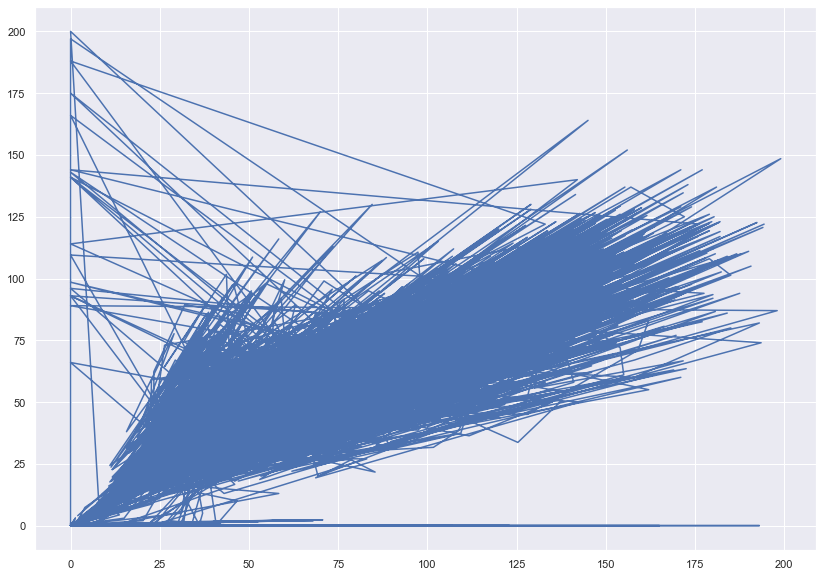

In [34]:
plt.figure(figsize=(14,10))
plt.plot(app, es)
plt.show()

C:\Users\zhenu\AppData\Local\Temp\ipykernel_4712\2587422534.py:26: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(orientation='vertical')
C:\Users\zhenu\AppData\Local\Temp\ipykernel_4712\2587422534.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(orientation='vertical')


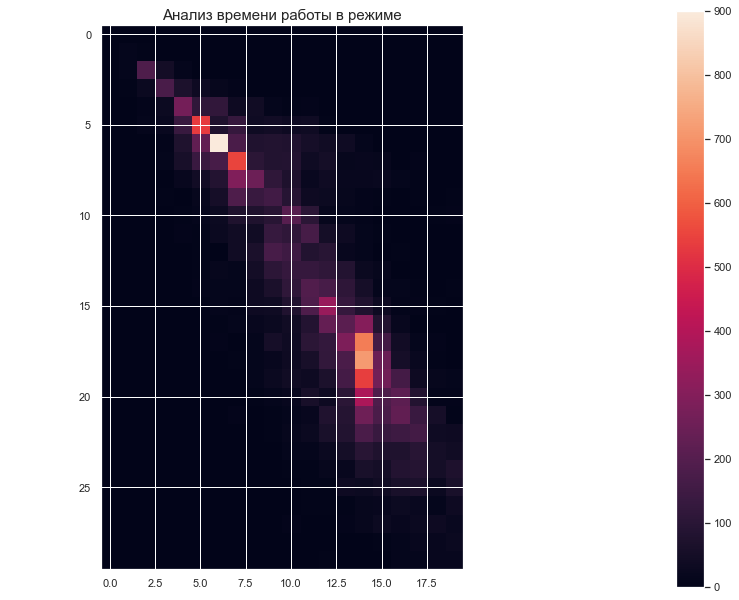

In [35]:
app_begine = 0#10
app_end = 30#25 #150/5 == 30
es_begine = 0#5
es_end = 20 #100/5 == 20
working_time_slice = working_time[app_begine:app_end]
working_time_changed = []
for i in range(len(working_time_slice)):
    raw_ = []
    for j in range(es_begine, es_end):
        raw_.append(working_time_slice[i][j])
    working_time_changed.append(raw_)

H = np.array(working_time_changed)
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')
plt.title('Анализ времени работы в режиме', fontsize=15)
cax = fig.add_axes([0.24, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
#plt.colorbar(location='bottom')
plt.show()

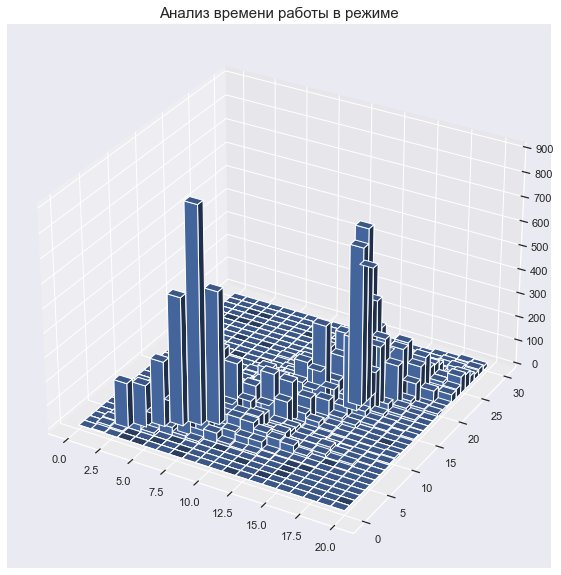

In [36]:
num_interval_es_ = es_end - es_begine
num_interval_app_ = app_end - app_begine
working_time_ = working_time_changed
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
plt.title('Анализ времени работы в режиме', fontsize=15)
y = np.array([[i] * num_interval_es_ for i in range(num_interval_app_)]).ravel()
x = np.array([i for i in range(num_interval_es_)] * num_interval_app_)
z = np.zeros(num_interval_es_*num_interval_app_)
dx = np.ones(num_interval_es_*num_interval_app_)
dy = np.ones(num_interval_es_*num_interval_app_)
A = np.array(working_time_)
dz = A.ravel()
#print(working_time_)
ax.bar3d(x, y, z, dx, dy, dz)
plt.show()

In [37]:
np.array(working_time[:])

array([[  0,   3,   0, ...,   0,   0,   0],
       [  0,  11,   6, ...,   0,   0,   0],
       [  0,  14, 186, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])